In [1]:
!pip install IPython
from IPython.display import Image

### Softmax Regression
1. logistic regression 복습
- 시그모이드 함수 $g(x)= \frac{1} {1+e^-2}$
- H(x)= g(H(x))
2. multinomial classification
- binary classification 만으로 구분 가능함 => 여러개의 binary classification 이용
- 벡터의 내적이용해서 독립된 hypothesis 구할수있음
3. Where is sigmoid ?
- logistic classifier 써서
- WX=Y (2.0,1.0,0.1) 로 나타냈을때 0과 1사이에서의 값으로 표현하고 싶음
4. Cost function
- 예측값과 실제값이 얼마나 차이나는지
- cross-entropy : $ - \sum Llog(Si)$ , L= 실제값, Si: 예측값(Y hat)

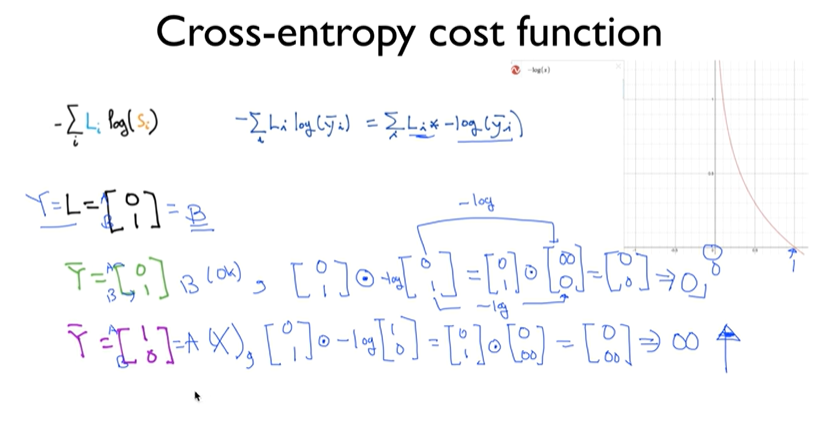

In [3]:
Image("C:\스크린샷(476).png")

- 예측이 틀렸을때 cost 값을 크게 주고, 예측이 맞았을때 cost function 값 0 임

5. logistic cost vs cross entropy
- $C(H(x),y) = ylog(H(x)) - (1-y)log(1-H(x))$
- $ D(S,L)= - \sum Llog(Si)$ 
- 두개가 같은 의미이다 왜냐 ? Si 값들은 예측값들인데 이들의 합이 1 이기때문

In [4]:
import tensorflow as tf
import numpy as np

C:\Users\alaco\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
x_data=[[1,2,1,1],
       [2,1,3,2],
       [3,1,3,4],
       [4,1,5,5],
       [1,7,5,5],
       [1,2,5,6],
       [1,6,6,6],
       [1,7,7,7]]
y_data=[[0,0,1],
       [0,0,1],
       [0,0,1],
       [0,1,0],
       [0,1,0],
       [0,1,0],
       [1,0,0],
       [1,0,0]]

In [6]:
#3개의 클래스 분류할때 0,1,2 를 각각 [1,0,0], [0,1,0] ,[0,0,1] 로 하나만 hot하게 표시
x_data= np.array(x_data,dtype=np.float32)
y_data= np.array(y_data,dtype=np.float32)

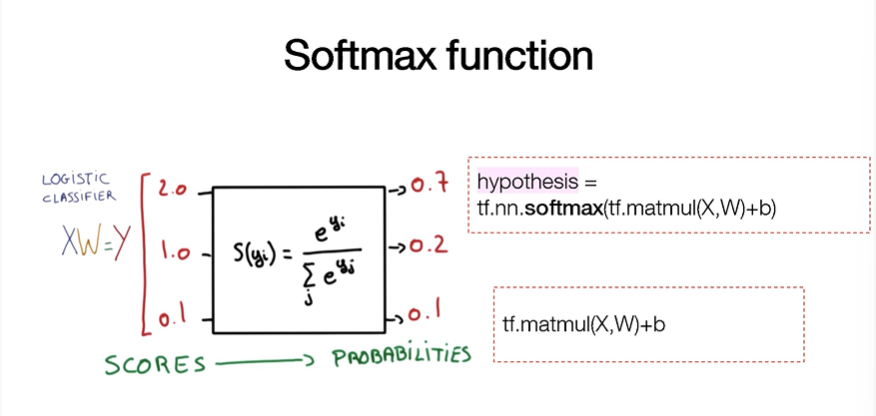

In [11]:
Image("C:\스크린샷(478).png")

In [10]:
#y의 개수 = 클래스 개수 = label개수
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
W = tf.Variable(tf.random.normal([4,3], name='weight'))
b = tf.Variable(tf.random.normal([3]),name = 'bias')
variable = [W, b]

dataset.element_spec


def softmax_fn (features):
    hypothesis = tf.nn.softmax(tf.matmul(features,W)+b)
    return hypothesis

def loss_fn (features, labels):
    hypothesis = tf.nn.softmax(tf.matmul(features,W)+b)
    cost = tf.reduce_mean(-tf.reduce_sum(y_data * tf.math.log(hypothesis), axis =1))
    return cost

def grad (hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(features, labels)
    return tape.gradient(loss_value, [W, b])

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
   
n_epochs = 3000
for step in range(n_epochs + 1):
    
    for features, labels in iter(dataset):
        hypothesis = softmax_fn (features)
        grads = grad(hypothesis, features, labels)
        optimizer.apply_gradients(grads_and_vars = zip(grads, [W, b]))
    
    if step % 300 == 0:
            print("iter: {}, Loss: {:.4f}".format(step, loss_fn(features, labels)))
            
a = x_data
a = softmax_fn (a)
print(hypothesis) #softmax 함수를 통과시킨 x_data

#argmax 가장큰 값의index를 찾아줌

print(tf.argmax(a,1)) #가설을 통한 예측값
print(tf.argmax(y_data,1)) #실제 값

iter: 0, Loss: 3.4163
iter: 300, Loss: 1.2564
iter: 600, Loss: 0.8534
iter: 900, Loss: 0.6738
iter: 1200, Loss: 0.5757
iter: 1500, Loss: 0.5204
iter: 1800, Loss: 0.4857
iter: 2100, Loss: 0.4610
iter: 2400, Loss: 0.4416
iter: 2700, Loss: 0.4255
iter: 3000, Loss: 0.4115
tf.Tensor(
[[0.00882391 0.05675838 0.9344177 ]
 [0.01933604 0.19504358 0.7856204 ]
 [0.00745514 0.35878068 0.6337642 ]
 [0.01077612 0.6517302  0.33749366]
 [0.56429803 0.39987904 0.03582295]
 [0.26131836 0.72779036 0.01089121]
 [0.5942565  0.39927584 0.00646763]
 [0.70879656 0.28998402 0.00121939]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 0 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


### Softmax classifier(animal classification)

In [12]:
tf.random.set_seed(777)  # for reproducibility

In [17]:
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, -1]

nb_classes = 7  # 0 ~ 6

# Make Y data as onehot shape
Y_one_hot = tf.one_hot(y_data.astype(np.int32), nb_classes)

print(x_data.shape, Y_one_hot.shape)

(101, 16) (101, 7)


In [18]:
#Weight and bias setting
W = tf.Variable(tf.random.normal((16, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
def logit_fn(X):
    return tf.matmul(X, W) + b

def hypothesis(X):
    return tf.nn.softmax(logit_fn(X))

def cost_fn(X, Y):
    logits = logit_fn(X) 
    #logits 사용하는 이유가 뭐라고 ?
    cost_i = tf.keras.losses.categorical_crossentropy(y_true=Y, y_pred=logits, 
                                                      from_logits=True)    
    cost = tf.reduce_mean(cost_i)    
    return cost

def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads
    
def prediction(X, Y):
    pred = tf.argmax(hypothesis(X), 1)
    correct_prediction = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    #cast 가 뭐지?

    return accuracy

In [15]:
def fit(X, Y, epochs=1000, verbose=100):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
#             print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))
            acc = prediction(X, Y).numpy()
            loss = cost_fn(X, Y).numpy() 
            print('Steps: {} Loss: {}, Acc: {}'.format(i+1, loss, acc))

fit(x_data, Y_one_hot)

Steps: 1 Loss: 3.6350293159484863, Acc: 0.1683168262243271
Steps: 100 Loss: 0.5194157958030701, Acc: 0.7920792102813721
Steps: 200 Loss: 0.31850093603134155, Acc: 0.9108911156654358
Steps: 300 Loss: 0.23534880578517914, Acc: 0.9405940771102905
Steps: 400 Loss: 0.1887214034795761, Acc: 0.9504950642585754
Steps: 500 Loss: 0.15846037864685059, Acc: 0.9504950642585754
Steps: 600 Loss: 0.13703757524490356, Acc: 0.9900990128517151
Steps: 700 Loss: 0.1209898367524147, Acc: 0.9900990128517151
Steps: 800 Loss: 0.10847964137792587, Acc: 1.0
Steps: 900 Loss: 0.09843038767576218, Acc: 1.0
Steps: 1000 Loss: 0.09016556292772293, Acc: 1.0
